<a href="https://colab.research.google.com/github/EndangSupriyadi/GCI_GLOBAL_2025/blob/master/lec5_2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-2 Statistics and Probability

**Chapter Introduction**  
In the first half of this chapter, you will learn the basics of statistical analysis as a method for analyzing data objectively and clarifying its trends. Statistical analysis is broadly divided into **descriptive statistic** and **inferential statistics**. In this course, we will look at descriptive statistics along with regression, which is one of the inferential statistics.

We will use the dataset of high school students' attributes and their grades, available in UC Irvine Machine Learning Repository, to learn about the methodology using Python.

Goal: To be able to load data from a CSV file, calculate and visualize basic statistics, and perform a single regression analysis.

## Table of contents

- **4-2.1 Types of Statistical Analysis**
    - 4-2.1.1 Descriptive and Inferential Statistics
    - 4-2.1.2 Importing Libraries

- **4-2.2 Reading and Interacting with Data**
    - 4-2.2.1 Loading Target Data Distributed on the Internet
    - 4-2.2.2 Loading and Checking data
    - 4-2.2.3 Checking the Nature of Data
    - 4-2.2.4 Quantitative and Qualitative Data

- **4-2.3 Descriptive Statistics**
    - 4-2.3.1 Histogram
    - 4-2.3.2 Mean, Median, Mode
    - 4-2.3.3 Variance and Standard Deviation
    - 4-2.3.4 Summary Statistics and Percentile Values
    - 4-2.3.5 Box-and-whisker Plot
    - 4-2.3.6 Coefficient of Variation
    - 4-2.3.7 Scatter Plots and Correlation Coefficients
    - 4-2.3.8 Draw Histograms Scatter Plots for All Variables

- **4-2.4 Advanced: Simple Regression Analysis**
    - 4-2.4.1 Simple Linear Regression Analysis
    - 4-2.4.2 Coefficient of Determination

- **4-2.5 Comprehensive Question**
    - Question4-2-1 Statistical Basics and Visualization
    - Question4-2-2 Lorenz Curve and Gini coefficient

***

## 4-2.1 Types of Statistical Analysis

Keywords: descriptive statistics, inferential statistics, mean, standard deviation, single regression analysis, Numpy, Scipy, Pandas, Matplotlib, Scikit-learn

### 4-2.1.1 Descriptive and Inferential Statistics
Statistical analysis is a method of objectively analyzing data to identify trends from the data. The methods are mainly divided into **descriptive statistics** and **inferential statistics**.
<br>


**Descriptive Statistics**<br>
Descriptive statistics is a method of capturing the characteristics of collected data and organizing the data so the characteristics are easy to see. Calculating the characteristics of data by calculating the mean, standard deviation, etc., to classify data, and representing data in figures and graphs are examples of descriptive statistics. These are covered in detail in section 4-2.3.

**Inferential Statistics**<br>
Inferential statistics is a method of making inferences from collected data. For example, suppose we want to find out the height of the entire Japanese population by age. Since it is difficult to find out the height of all the people, we would take a randomly selected subset of the population and infer from the data of this subset. Like so, the concept of inferential statistics is to obtain statistics from only partial data by conducting a precise analysis using a model based on probability distribution and inferring the whole.
Inferential statistics are also used to predict the future from past data. In section 4-2.4, we will discuss single regression analysis, the foundation of inferential statistics. More complex inferential statistics will be covered in the next chapter.

### 4-2.1.2 Importing Libraries Used in This Chapter

This chapter will make use of various libraries. We will proceed under the assumption that the following libraries have been imported.

In [ ]:
# Please ensure that the following libraries are imported in advance.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# Visualization library
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# Display up to three decimal places
%precision 3

'%.3f'

Also, in section 4-2.4, we will use `sklearn.linear_model`, a library for linear regression analysis in Scikit-learn. Scikit-learn is a basic machine learning library.

Import it as follows:

In [ ]:
from sklearn import linear_model

## 4-2.2 Reading and Interacting with Data

Keywords: directory (folder) manipulation, CSV, quantitative data, qualitative data, average

The target data must be first downloaded from the web so that it can be loaded by Python to do further analysis.
Data is commonly handled as CSV formatted data or as a database. Some data for research are also available on the Internet in compressed ZIP format.
Let's start by learning how to download such data.

### 4-2.2.1 Downloading the Data

This section will assume a situation in which the target data is available on the web as a ZIP file. Although it is possible to download the data from a browser, Python allows you to directly download the data.

#### Dataset Description

Let's download the sample data to this directory. We will use [student performance data](https://archive.ics.uci.edu/dataset/320/student+performance) here. The dataset contains information about student grades, demographic, social and school related features.

#### Libraries for downloading ZIP files

First, import the libraries for downloading ZIP files and files. Use the following three libraries to read ZIP files or download files directly from the Web:

- `requests` … Sends and receives web data.
- `zipfile` … reads and writes ZIP format files.
- `io` … reads and writes a file

In [ ]:
# Libraries for retrieving data from the web and handling zip files
import requests, zipfile
from io import StringIO
import io

#### Download and extract the ZIP file
We will use the following file, which is in ZIP format.

http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip

To download and extract this file, we first use `requests.get()` function to download the data from the URL we specify, then use `io.BytesIO()` and `zipfile.ZipFile()` to extract the data as binary stream and store as a ZipFile object, then finally use `z.extractall()` method to extract the files from the ZIP file.
The files will be extracted to the current directory.

In [ ]:
# Specify the url where the data is located
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# Get data from url
r = requests.get(url, stream=True)

# Read and extract the zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

Check that the data has been downloaded and extracted properly when the download is finished. You can view the list of files in the current directory by executing the `ls` command as follows.

In [ ]:
!ls

sample_data  student-mat.csv  student-merge.R  student-por.csv	student.txt


Once successfully extracted, four files named “student.txt”, “student-mat.csv”, “student-merge.R”, and “student-por.csv” will be located. We will use two of these data, “student-mat.csv” and “student-por.csv” in this notebook.


### 4-2.2.2 Loading the Data
We will first observe what the “student-mat.csv” data looks like. We will use the “student-por.csv” data in a practice question later on.

First, we will read the data of interest and treat it as a Pandas `DataFrame` object. If you run `pd.read_csv()` with the filename `student-mat.csv` file as an argument as follows, the file will be read and become a `DataFrame` object.

For this dataset, we need to specify the `sep` argument. In most CSV format files, it is customary to use “,” (comma) as the data delimiter, but since the downloaded data is delimited by “;”, the data will be loaded wrongly by just running `pd.read_csv()`.
To change the delimiter, specify “`sep=‘delimiter’`”.

In [ ]:
student_data_math = pd.read_csv('student-mat.csv', sep=";")
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The data is now correctly delimited.

Note that it is not usually clear what is the right delimiter for data that we first encounter with. In data analysis practice, we often look for the delimiter character through trial and error.

In addition to `sep`, there are several other parameters for this `pd.read_csv()`. Make sure to check the documentation.

### 4-2.2.3 Checking the Nature of the Data
Looking at the data we just loaded, we can tell that it contains information on student attributes such as `school` and `age`. However, we still do not know how many data we have or what kind of data we have.


#### Checking for missing data and data types
The following `info` will tell you the number of non-null data and variable type for all variables.

In [ ]:
# Check information in all columns
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

The first line says “`RangeIndex: 395 entries, 0 to 394`”, indicating that there are 395 pieces of data.
The `non-null` means data that is not `null`. Since there is “`395 non-null`” for all variables, it seems that there is no `null` data this time.


#### Side Note: What is a "variable"?

The term “variable” is used both in the Python programming world and in the mathematical world of data analysis. Which it means depends on the context.
- Python variables: These are functions for storing data. For example, we use it as“assign to variable `a`”.
- Variables in data analysis: These are the values that change in the data of interest. It can be actual real data or predicted data. Some are referred to by special terms, such as “target variable” or “explanatory variable,” as we will see later in this chapter.
The context immediately above, “for all variables, it seems that there is no `null` data this time”, indicates the “variables in data analysis”. In other words, it refers to the respective data columns, labeled “`school`”, “`sex`”, “`age`”, etc.

#### Viewing the documentation
To further understand this data, let's figure out what exactly these data columns are.
Actually, the student.txt file included in the downloaded data contains detailed information about the variables. If you are familiar with the shell, command line, etc., you can see its contents here with **less filename** or **cat filename**. Otherwise, you may want to open it directly with a text editor or with a similar tool.
You will find organized information about the contents of student.txt below.

Although the meaning of the data is understood from student.txt here, in actual business settings, data items are confirmed by getting information from someone who is familiar with the data or by reading and checking the data specifications.

**Data Attribute Description**

1 school - school （binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira）<br>
2 sex - sex（binary: "F" - female or "M" - male）<br>
3 age - age（numeric: from 15 to 22）<br>
4 address - type of address（binary: "U" - urban or "R" - rural）<br>
5 famsize - family size（binary: "LE3" - less or equal to 3 or "GT3" - greater than 3）<br>
6 Pstatus - Whether or not you live with your parents（binary: "T" - living together or "A" - apart）<br>
7 Medu - educational background of mother（numeric: 0 - none,  1 - primary education（4th grade）, 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education）<br>
8 Fedu - educational background of father: 0 - none,  1 - primary education（4th grade）, 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education）<br>
9 Mjob - Mother's job（nominal: "teacher", "health" care related, civil "services"（e.g. administrative or police）, "at_home" or "other"）<br>
10 Fjob - Father's job（nominal: "teacher", "health" care related, civil "services"（e.g. administrative or police）, "at_home" or "other"）<br>
11 reason - reason for choosing school（nominal: close to "home", school "reputation", "course" preference or "other"）<br>
12 guardian - student's guardian（nominal: "mother", "father" or "other"）<br>
13 traveltime - commuting time to school（numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour）<br>
14 studytime - Weekly study hours（numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours）<br>
15 failures - number of past class failures in the past（numeric: n if 1<=n<3, else 4）<br>
16 schoolsup - Extra education support（binary: yes or no）<br>
17 famsup - Education support for family（binary: yes or no）<br>
18 paid - Additional paid classes（Math or Portuguese）（binary: yes or no）<br>
19 activities - Extracurricular activities（binary: yes or no）<br>
20 nursery - Whether or not the student have ever attended a preschool （binary: yes or no）<br>
21 higher - Whether the student want to get a higher education or not（binary: yes or no）<br>
22 internet - whether or not the student have interet access at home（binary: yes or no）<br>
23 romantic - Romantic relationship（binary: yes or no）<br>
24 famrel - Relationship with family（numeric: from 1 - very bad to 5 - excellent）<br>
25 freetime - Freetime after school（numeric: from 1 - very low to 5 - very high）<br>
26 goout - Whether or not the student hang out with his/her friends（numeric: from 1 - very low to 5 - very high）<br>
27 Dalc - Weekday Alcohol Consumption（numeric: from 1 - very low to 5 - very high）<br>
28 Walc - Weekend Alcohol Consumption（numeric: from 1 - very low to 5 - very high）<br>
29 health - Current health status（numeric: from 1 - very bad to 5 - very good）<br>
30 absences - Absenses from school（numeric: from 0 to 93）<br>
31 G1 - Grade from 1st semester（numeric: from 0 to 20）<br>
31 G2 - Grade from 2nd semester（numeric: from 0 to 20）<br>
32 G3 - Grade from final semester（numeric: from 0 to 20, output target）

### 4-2.2.4 Quantitative and Qualitative Data

Looking at the data above, there are both numerical data and attribute data such as gender.

Data can basically be divided into two categories: quantitative data and qualitative data. Note that they need to be handled differently when aggregating and modeling.

**Quantitative data**: Data expressed in terms of continuous or discrete values to which the four arithmetic operations can be applied, and which have meaning in terms of proportions. For example, data on the number of people, the amount of money, etc.

**Qualitative data**: Data to which the four arithmetic operations cannot be applied. Example: Data such as rankings and categories.


#### Examples of Quantitative and Qualitative Data
The following code specifies “gender” in the data just loaded. This data is qualitative data because it is not specifically quantified and is not comparable.

In [ ]:
student_data_math['sex'].head()

,sex
0,F
1,F
2,F
3,F
4,F


The following code specifies the number of absences in the data column. This data is quantitative data.

In [ ]:
student_data_math['absences'].head()

,absences
0,6
1,4
2,10
3,2
4,4


#### Calculating averages by axis
Now let's use the Pandas technique we learned earlier to compute the mean value of age for each gender. We can do so by doing the following.

In [ ]:
student_data_math.groupby('sex')['age'].mean()

,age
sex,
F,16.730769
M,16.657754


We've taken a quick look at the data, including the columns and their values. Since it is possible to aggregate data from various other perspectives, let's make a hypothesis (e.g., men consume more alcohol than women) and see if the hypothesis holds true by implementing it.

>**[Let's try!]**
>
> Using the data you have loaded, aggregate the data from various perspectives. What hypotheses would you consider? And what implementation will you do to confirm your hypothesis?

## 4-2.3 Descriptive Statistics
Keywords: descriptive statistics, quantitative data, qualitative data, histogram, interquartile range, summary statistics, mean, variance, standard deviation, coefficient of variation, scatterplot, correlation coefficient

Now that you have an overview of the data, we will learn about the main topic, **descriptive statistics**.

### 4-2.3.1 Histogram
First, we will consider the number of absences in this data. When we checked the sample in `head`, we found a variety of values, such as 10 and 2.

The following histogram is to see how many of each value there are. Using Matplotlib, which you learned about in “The Basics of Matplotlib,” you can use `hist` to display the graph (see also “4-1.2.4 Histograms” for more information about histograms).

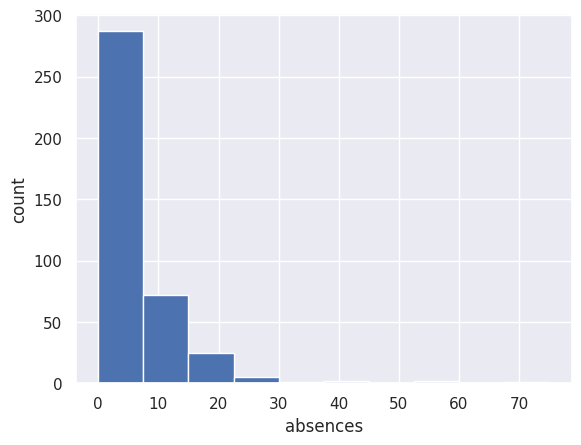

In [ ]:
# histogram and specifying data
plt.hist(student_data_math['absences'])

# label for x-axis and y-axis
plt.xlabel('absences')
plt.ylabel('count')

# Adding grid
plt.grid(True)

By looking at the histogram above, we can see that the data is concentrated around 0 to 10. On the other hand, there are also data above 70 and so on, which indicate a long-tail distribution. The long tail is a distribution in which the hem of the distribution is gradually decreasing. The distribution above is known as a “right-skewed distribution.”The "right" and the "left" is often mistaken, due to the appearance of the graph so be careful with the terminology.

### 4-2.3.2 Mean, Median, Mode
Although this histogram is crucial for viewing the overall picture of the data, it does not provide information such as when the data can be said to be biased, making it a little less objective. Therefore, the following summary statistics (median, mean, standard deviation, etc.) can be calculated to quantify data trends and represent data more objectively.

In [ ]:
# Average
print('average：', student_data_math['absences'].mean())
# Median：Separating data by median makes the number of data the same before and after the median (the middle value of the data), less susceptible to outlier values
print('median：', student_data_math['absences'].median())
# Mode：Most frequent value
print('mode：', student_data_math['absences'].mode())

average： 5.708860759493671
median： 4.0
mode： 0    0
Name: absences, dtype: int64


The formula for calculating the average $\overline{x}$ is as follows where $x_i$ is the $i$th data (value).

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

### 4-2.3.3 Variance and Standard Deviation
The next step is to determine whether this data is scattered or clumped (clumped around the mean), which is indicated by variance. The formula for variance is as follows. Variance is commonly denoted as $\sigma^2$.

\begin{eqnarray}
\sigma^2 = \frac{1}{n-1}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}

※ Supplement
Note : The above formulas are for “unbiased variance” in detail. For more detailed information, please refer to the section “4-2.11 Statistical Estimation”.

It can be calculated with `var()` after specifying the relevant variable. The smaller the value, the less scattered the data.

In [ ]:
# variance
student_data_math['absences'].var()

64.050

The standard deviation is the square root of the variance and is commonly denoted by $\sigma$.

\begin{eqnarray}
\sigma = \sqrt{\frac{1}{n-1}\sum^n_{i=1}(x_i-{\overline{x}} )^2}
\end{eqnarray}

Variance does not tell us how much the actual scattering of the data is. This is because, as you can see from the definition formula for variance presented above, it is squared in the formula. If we use the standard deviation, the dimension of the unit is the same as the actual data, so the following results show that there is a variation of about ±8 days. The standard deviation can be calculated with `std()`.

In [ ]:
# Standard deviation σ
student_data_math['absences'].std()

8.003

Note that the square root can be calculated with `np.sqrt`, therefore the following method is the same as the previous.

In [ ]:
np.sqrt(student_data_math['absences'].var())

8.003095687108177

### 4-2.3.4 Summary Statistics and Percentile Values

We have looked at the statistics one by one, but you can see the summary statistics we have looked at by running the `describe` method on the `DataFrame` loaded in Pandas.

The `describe` method allows you to calculate the number of data, mean, standard deviation, minimum, 25th, 50th, and 75th percentile values, and maximum value, in that order.

The `percentile value` is a number that represents the number of the smallest number of the total number of data (100). For example, the 10th percentile is the 10th smallest of 100 data points, the 50th percentile is the 50th middle value, or median, and the 25th and 75th percentile are also called the first and third quartiles, respectively.

In [ ]:
# Summary Statistics
student_data_math['absences'].describe()

,absences
count,395.000000
mean,5.708861
std,8.003096
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,75.000000


#### Finding the Quartile Range
The result of the `describe` method goes into a `Series` object.

Each element can be obtained as `describe()[index number]`. For example, the value of `mean` for the mean is `describe()[1]` and the value of `std` for the standard deviation is `describe()[2]`.

You can calculate using values of each element by referring to them. For example, if you want to calculate the difference between the 75th and 25th percentile tiles, called **quartile range**, you would use the fifth and seventh elements from the top and calculate the following.

In [ ]:
# Quartile range(75th to 25th)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

<ipython-input-24-fd1528f549c8>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]
<ipython-input-24-fd1528f549c8>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]


8.0

#### Obtaining results for all columns

Running the `describe` method without specifying column names or elements allows you to obtain summary statistics for all quantitative data. This is useful for calculating the statistics all at once. You can also narrow down the columns and perform the calculation.

In [ ]:
# Summary statistics summary calculation
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### <Practice Question 4-2-1>

The downloaded data comes with another csv file, "student-por.csv" which has the students' scores for Portugese class.

Load "student-por.csv" and view the summary statistics.

In [ ]:
student_data_por = # WRITE ME

# WRITE ME

### 4-2.3.5 Box-and-whisker Plot
Although, we have calculated the maximum, minimum, median, and interquartile range, it is difficult to make comparisons by simply looking at the numbers. That is when we can use **Box-and-whisker plot** to show them as a figure.

The two examples below are box-and-whisker plots of “first term grade G1” and “number of absences,” respectively. You can see that they are quite different in characteristics.

The top of the box is the third quartile, the bottom is the first quartile, and the middle line is the median. The top and bottom of the whiskers are the furthest data points within 1.5 times the interquartile range (IQR) from the box (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

This will give you an idea of the range of data you are dealing with.

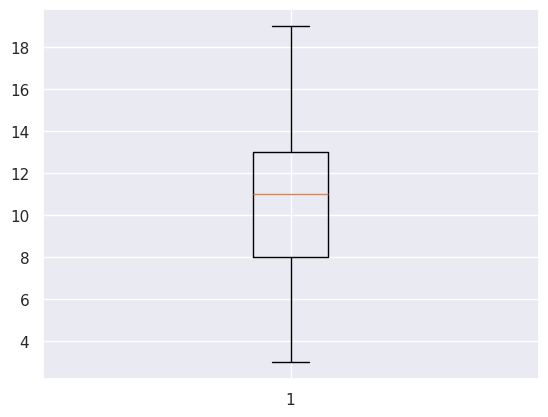

In [ ]:
# Box-and-whisker plot: G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

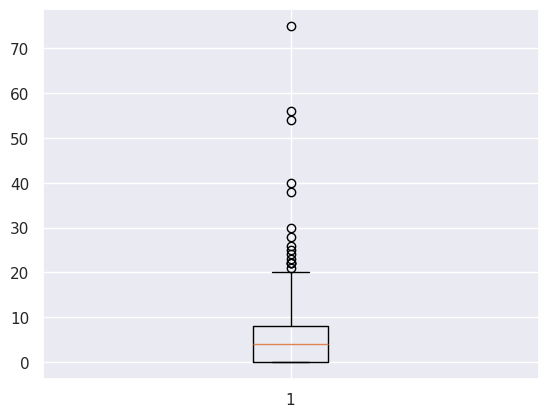

In [ ]:
# Box-and-whisker plot: Number of absences
plt.boxplot(student_data_math['absences'])
plt.grid(True)

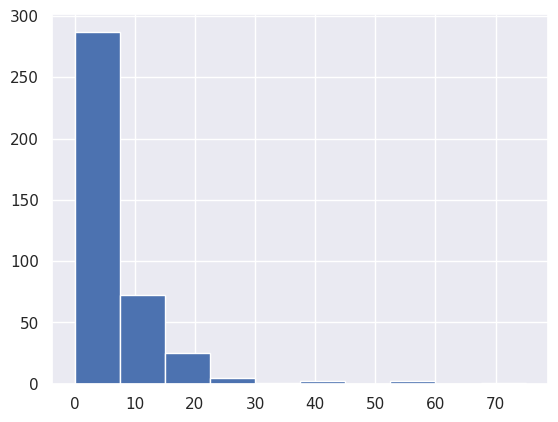

In [ ]:
# Histogram
plt.hist(student_data_math['absences'])
plt.grid(True)

Note that outliers of the data would also be displayed by default. To omit outliers, you must specify `sym=“”`.

Outliers are also called anomalies, and they do not have a particular definition. It is sometimes determined by the conventions of each industry. The graph above omits outliers, but there are times when they are not omitted. We will not go into details about outliers and anomalies, as they are beyond the level of this document.

You can draw a box-and-whisker plot with other variables, so let's do that.

>**[Let's try!]**
>
>Display box-and-whisker plots for the other variables as well. What does it look like? Think about what we can learn from it.

Multiple box-and-whisker plots can be displayed side to side as shown below.

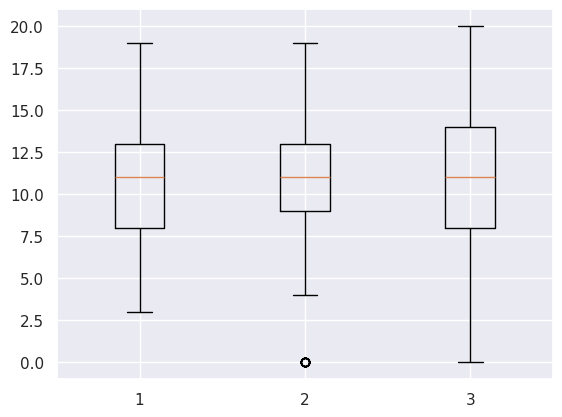

In [ ]:
# Box-and-whisker plots: G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

#### <Practice Question 4-2-2*>

`sns.boxplot()` can be used to plot box-and-whisker plot directly from the dataset. Specifying `x` and `y` argument, you can group the data on the `y` column and visualize the box-and-whisker plot of the `x` column.

Using this, make a side-by-side box-and-whisker plot of the final Portugese grade, `G3`, by grouping on (1) `Dalc` column, which represent level of alcohol consumption on weekdays, and (2) `Walc` column, which represent level of alcohol consumption on weekends. What insights can you see from the graph?

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# WRITE ME

# WRITE ME

### 4-2.3.6 Coefficient of Variation
Next, we will discuss the **coefficient of variation**.

We have looked at variance and standard deviation, but these cannot be simply compared for different types of data. This is because the deviation tends to be larger for data with a larger size. For example, let us calculate the standard deviation of stock prices (e.g., Nikkei 225) and the standard deviation of exchange rates (e.g., dollar-yen), respectively. It is nonsense to directly compare these two standard deviations. The reason is that the Nikkei average, which moves around 20,000 yen, and the standard deviation of an exchange rate, which moves around 100 yen, are on different scales.

This is where the coefficient of variation comes in. The coefficient of variation is the standard deviation divided by the mean. This value allows for scale-independent comparisons. Variables are commonly denoted by $CV$.

\begin{eqnarray}
CV = \frac{\sigma}{\overline{x}}\
\end{eqnarray}

In [ ]:
# Coefficient of variation: number of absences
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.4018726369879067

Note that the coefficient of variation cannot be output as a result of `describe()`, but it can be calculated at once by doing the following. Pandas DataFrame (or Numpy) can be calculated for each element. The results show that the data for the number of failures and absences are highly scattered.

In [ ]:
# Calculate the coefficient of variation for each together
student_data_math.std(numeric_only=True) / student_data_math.mean(numeric_only=True)

,0
age,0.076427
Medu,0.398177
Fedu,0.431565
traveltime,0.481668
studytime,0.412313
failures,2.225319
famrel,0.227330
freetime,0.308725
goout,0.358098
Dalc,0.601441


### 4-2.3.7 Scatter Plots and Correlation Coefficients

So far we have focused on only one variable to calculate graphs and summary statistics. Next, let's learn about scatter plots and correlation coefficients in order to see the relationships among variables.

The following scatterplot shows the relationship between the first term grade G1 and the final grade G3.

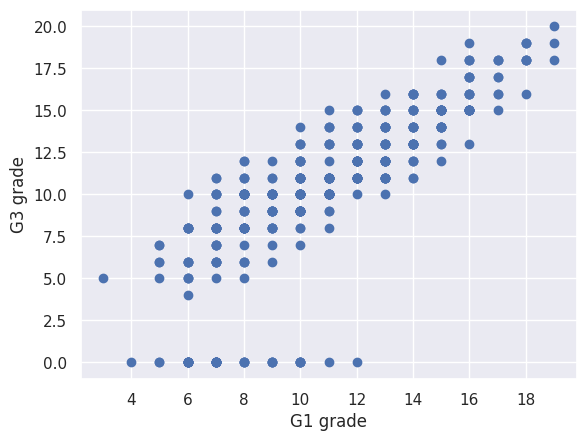

In [ ]:
# Scatter Plots
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# Label
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

It is natural that those who have better results from the beginning (higher G1 values) also have better results later (higher G3 values), but the graph clearly shows this as a trend.
To add, if you look closely at this graph, you will see that some people have a final grade (G3) of 0. Since there was no one with a score of 0 in the first term, we cannot determine whether this is an outlier or a correct value just by looking at the data. However, since the G3 score ranges from 0 to 20, we can assume it is a correct value and continue on (The G3 score is calculated by the aforementioned student. The G3 grade scores can be found by checking the “G3” column in the result of student_data_math.describe() mentioned before).

In the business world, we will interview people who are familiar with the data and with the people involved in order to have a better understanding of the data. There are many ways to deal with deficiencies of data, such as missing values, which we will learn about in later chapters.

#### Covariance
Next, we will consider quantifying the relationship between two variables. **Covaricance** is a measure for looking at the relationship between two variables which is defined as below. The covariance is $S_{xy}$ and shows the relationship between the two variables, $x, y$.

\begin{eqnarray}
S_{xy} = \frac{1}{n}\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})
\end{eqnarray}

Covariance is the average of the product of the deviations of two sets of variables. It is used when considering the variance of two or more sets of variables. Numpy has a function to calculate the matrix of covariance (covariance matrix), which can be obtained using the `cov` function as follows. In the following code, the covariance of G1 and G3 is being calculated.


In [ ]:
# Covariance matrix
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

The meaning of the resulting matrices is as follows

- Covariance of G1 and G3 ... the $(1,2)$ and $(2,1)$ elements of the covariance matrix. In the example above, the value is 12.188.
- Variance of G1 ... is the $(1,1)$ element of the covariance matrix. In the example above, it is 11.017.
- Variance of G3 ... $(2,2)$ element of the covariance matrix. In the example above, it is 20.99.

The variances of G1 and G3, respectively, can be calculated with the `var` function as explained before. When you calculate them, you will see that the values match.

In [ ]:
# Variange
print('G1 variance:', student_data_math['G1'].var())
print('G3 variance:', student_data_math['G3'].var())

G1 variance: 11.017053267364899
G3 variance: 20.989616397866737


#### Correlation Coefficient

According to its definition, covariance is dependent on the scale and units of each variable. On the other hand, the correlation coefficient quantifies the relationship between two variables without being affected by their scales. The formula that divides the covariance by the standard deviation of each variable (here $ x $ and $ y $) is the correlation coefficient. Its definition is as follows. The correlation coefficient is commonly denoted by $r_{xy}$.

\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n
(y_i - \overline{y})^2}}
\end{eqnarray}

The correlation coefficient takes values between -1 and 1. The closer it is to 1, the stronger the **positive correlation**. The closer it is to -1, the stronger the **negative correlation**. If it is close to 0, it is said to have **no correlation**.

In Python, you can calculate the correlation coefficient between two variables using Scipy's pearsonr function. For example, you can compute the correlation coefficient between G1 and G3 like this. When simply referring to the correlation function in data analysis, it generally means the Pearson function.

In [ ]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

PearsonRResult(statistic=0.8014679320174141, pvalue=9.00143031227676e-90)

The result was a high number, showing a correlation of '0.8'. The second value in the calculation result is called the p-value, which is explained in detail in '4.7.1 Hypothesis Testing'.

Note that there is no strictly high or low number for this number, and just because it is high does not mean that there is a **causal relationship**.

(Although it is not covered in detail in this course, if you want to understand the causal relationship, we will use an approach called **design of experiment**. For example, if you want to know whether a certain marketing measure was effective or not after viewing an advertisement, you divide the group into two groups: a treatment group that is shown the advertisement and a control group that is not shown any advertisement, and then calculate the ratio of the two groups).

The following calculation calculates the correlation matrix. For each variable, the correlation coefficient is calculated for all combinations. Since the correlation coefficient between G1 and G3 as shown earlier is 0.801, and the correlation coefficient for itself is obviously 1, this result is obvious.

In [ ]:
# Correlation matrix
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

Note that a correlation matrix can also be created in Pandas as follows.

In [ ]:
# Correlation matrix in Pandas
student_data_math[['G1', 'G3']].corr()

,G1,G3
G1,1.000000,0.801468
G3,0.801468,1.000000


In [ ]:
student_data_math.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [ ]:
student_data_math.corr()

ValueError: could not convert string to float: 'GP'

#### Visualization of correlation matrices

Heat maps are suitable for visualizing correlation matrices. A heat map is a method to visualize the coefficient values of each feature pair using a color gradient, and is often used to visualize correlation matrices.

Heat maps can be easily created using the seaborn library.

Let's visualize the Pandas correlation matrix created above by specifying it as an argument.

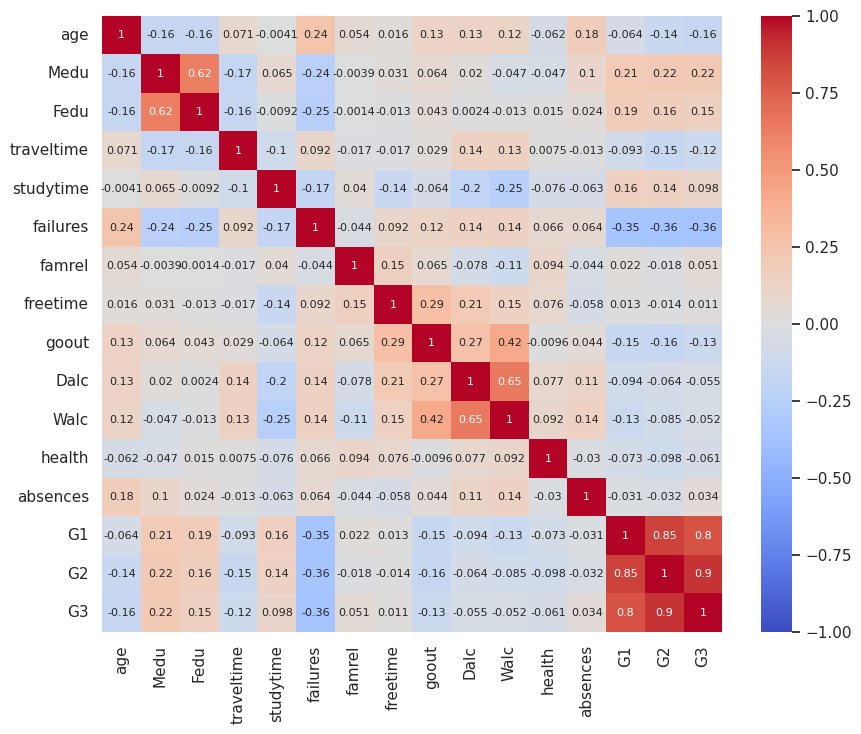

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=student_data_math.corr(numeric_only=True),
            annot=True,
            annot_kws={"fontsize":8},  # Specify font size when displaying values in each box.
            vmin=-1, vmax=1,  # Specify minimum and maximum colour bar values. Try what happens if you don't specify this.
            cmap="coolwarm")  # Learn more about cmaps.-> https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()

### 4-2.3.8 Drawing Histograms and Scatter Plots for All Variables

Finally, we will show you how to display all histograms and draw scatter plots for each variable.

For this kind of process, it is convenient to use the library `seaborn`, which provides a rich set of functions related to statistical data analysis and visualization. The `seaborn` package's `pairplot` is very useful because it allows you to see the relationships between various variables at once. However, if there are many variables, the calculation will take a while and it will be somewhat difficult to see. In such cases, it is recommended to select relevant data as described in“3.4.1 Data Selection and Assignment”.

Let's see if there is a relationship between alcohol intake and performance scores in the previous data.

Dalc is the amount of alcohol consumed on weekdays and Walc is the amount of alcohol consumed on weekends. We are looking at the relationship between them and first period grades (G1) and final grades (G3). Can we say that drinking alcohol is the reason for poor performance? Or does it have nothing to do with it?


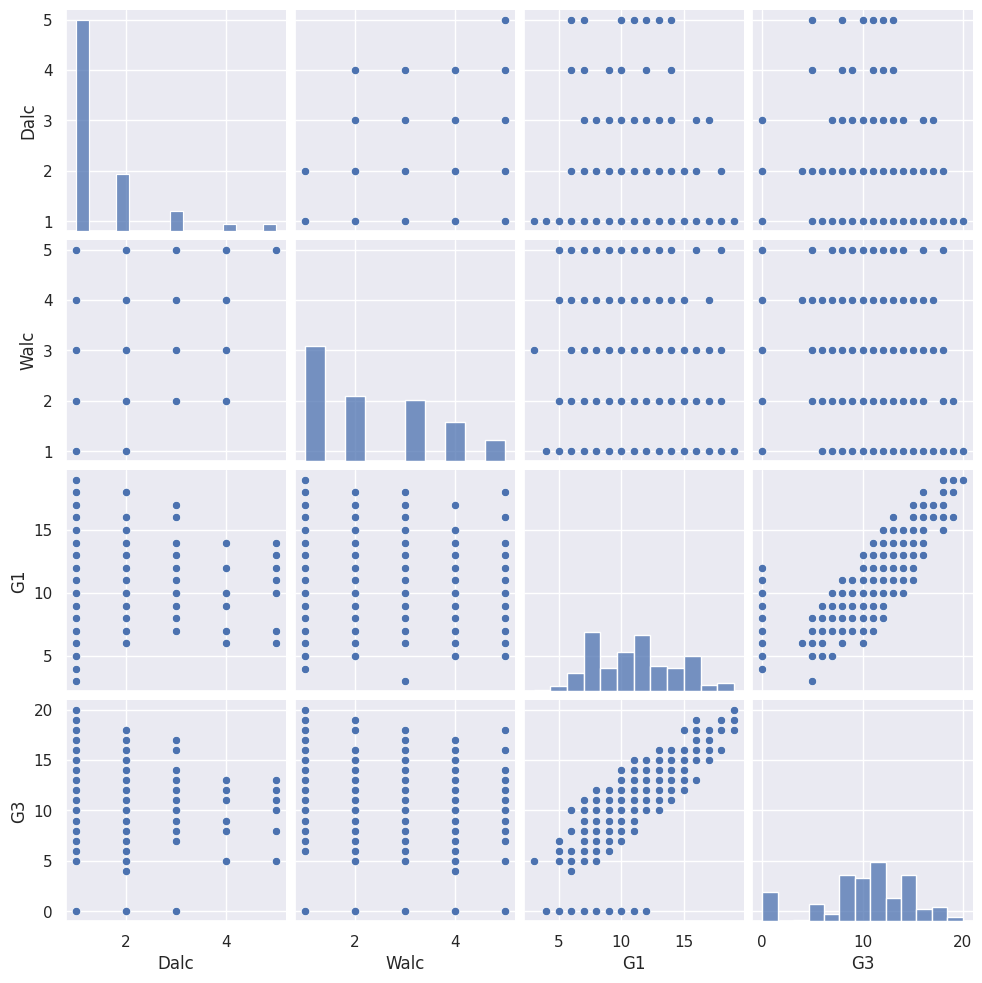

In [ ]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [ ]:
# Example: average first period performance of weekend alcohol drinkers
student_data_math.groupby('Walc')['G1'].mean()

,G1
Walc,
1,11.178808
2,11.270588
3,10.937500
4,9.980392
5,9.964286


From the graph, it appears that none of those who frequently drink alcohol on weekday (4 or 5) are doing well in G3, but none of them are doing extremely poorly either. It also appears that those who do not drink alcohol on weekends do a little better in the first term, but are these insights really accurate? It is difficult to determine from these graphs and numbers alone, but we will approach this in the following chapter on statistics and also in the following chapter on machine learning.


This concludes the fundamentals on descriptive statistics.

Although we went through the basics, what we have explained here is necessary work to get a good picture of the data for any data analysis.

This course will teach you how easy it is to do machine learning calculations using machine learning libraries and other tools, but it is also important to look at the basic statistics that we had done. Sometimes a simple scatterplot can reveal important trends. Also, what we have covered so far should probably be easy to follow and to explain someone without a mathematical background.

Data analysis itself doesn't require any use of machine learning. But by collaborating closely with others, exploring the data, and checking for unknowns or outliers, you'll set a stronger foundation before applying machine learning.

>**[Tips]**

>When analyzing data, look at basic statistics, histograms, scatter plots first to get an overall picture of the data.

#### <Practice Question 4-2-3>

Merge "student-math.csv" with "student-por.csv" using the following variables as the key.

`['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']`

Use inner join so that the merged data does not include any missing values.
In addition, add the parameter `suffixes=('_math', '_por')` so that we can know which data the variable names came from since they have the same names can be seen in each data.

Then, calculate the summary statistics.

#### <Pratice Question 4-2-4>

For the data merged in <Pratice Question 4-2-3>, pick up some variables such as `Medu`, `Fedu`, `G3_math`, etc. and create a scatterplot and histogram. What trends do you see? Are there any differences from only seeing the numbers of the summary statistics?

***

## 4-2.4 Advanced: Simple Regression Analysis
Keywords: scikit-learn, target variable, explanatory variable, single regression analysis, least squares, coefficient of determination

Next to descriptive statistics, let's learn the basics of regression analysis.
Regression analysis is an analysis that predicts numerical values. In machine learning, we make predictions about data, and the basis for this is the simple regression analysis we will discuss here.

Earlier, we graphed (scatterplot) the first term math grades and the final term math grades for the student data. From this scatter plot, we can see that there seems to be a relationship between G1 and G3.

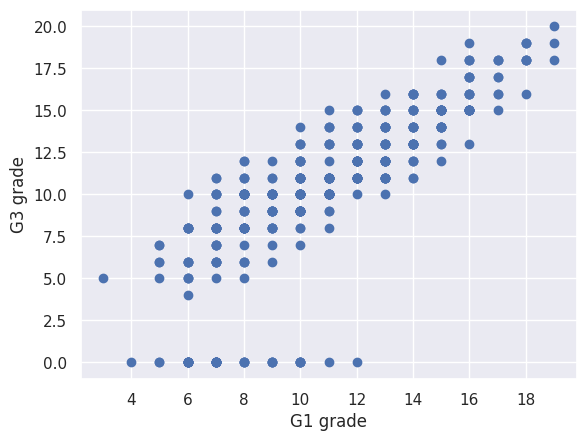

In [ ]:
# Scatter plot
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In regression problems, you assume a relationship equation from the given data and determine the coefficients that best fit the data. Specifically, you predict G3’s score based on the known score of G1. In other words, there is a target variable G3 (referred to as the dependent variable) that you predict using the variable G1 (referred to as the independent variable). This is also one of the methods of 'supervised learning' where the correct answers are provided for each data point during training, forming the basis for calculating the relationships. We will cover 'supervised learning' in the machine learning chapter.

Regression analysis methods are broadly divided into two categories in terms of the relationship between outputs (target variables) and inputs (explanatory variables): those with one input variable and those with two or more inputs variables. The former is called simple regression analysis and the latter is called multiple regression analysis. In this section, simple single regression analysis will be explained, and multiple regression analysis will be explained again in a later chapter on machine learning.

To fully understand the contents of this section, knowledge of statistics, estimation, and hypothesis testing—topics covered in the next chapter—is required. In fact, most statistics textbooks explain regression analysis only after covering these topics.

However, when using Python for regression analysis, you can perform calculations without such prior knowledge by using a high-level library called Scikit-learn. Therefore, in this section, we will first explain how to perform the actual calculations. You should be able to understand this section more deeply if you revisit it later after progressing further."

### 4-2.4.1 Simple Linear Regression Analysis

This section explains how to solve regression problems using the simple linear regression method, which assumes a linear relationship between output and **parameters** ($ y = wx + b $).

Simple linear regression analysis can be easily computed using `sklearn.linear_model`, which is available in a library called Scikit-learn, a package for machine learning. This package is also used in the later chapters of machine learning for further various calculations. First, import `linear_model` as follows, then create an instance.

In [ ]:
from sklearn import linear_model

# Create an instance of linear regression
reg = linear_model.LinearRegression()

In the following, a predictive model is calculated using a function called `fit` that sets the explanatory variable (say $X$) and the target variable (say $Y$) data and regresses them linearly.

In this case, the `fit` function calculates the regression coefficient $w$ and intercept $b$ using a method called **least squares method**. This method takes the sum of the squares of the differences between the actual and predicted data of the target variable and finds the coefficient and intercept when they are at their minimum. Expressed in equation, $y$ is the actual data and $ f(x) = wx + b $ is the predicted data, and the following equation is calculated to minimize it (the calculation involves differentiating this equation, but the fit function handles it for you, so we’ll skip the details.).

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

In [ ]:
# Using "first period math grade" as the explanatory variable.
# loc retrieves from the data frame, specifying rows and columns. loc[::, ['G1']] retrieves all columns in column G1
# Note that it is rewritten to values.
X = student_data_math.loc[:, ['G1']].values

# The target variable is "final math grade."
Y = student_data_math['G3'].values

In [ ]:
# Compute predictive model, where a and b are calculated
reg.fit(X, Y)

LinearRegression()

In [ ]:
# Regression Coefficient
print('Regression coefficient:', reg.coef_)

Regression coefficient: [1.106]


In [ ]:
# Intercept
print('Intercept:', reg.intercept_)

Intercept: -1.6528038288004634


In [ ]:
# Predict the target variable from the explanatory variables
y_pred = reg.predict(X)
print(y_pred)

[ 3.878  3.878  6.091 14.941  4.985 14.941 11.622  4.985 16.047 13.835
  9.41   9.41  13.835  9.41  13.835 13.835 12.729  7.197  4.985  7.197
 12.729 11.622 14.941 12.729  9.41   4.985 11.622 14.941 10.516  9.41
  8.304 17.154 17.154  7.197 11.622  7.197 14.941 14.941 11.622 13.835
  6.091 11.622 19.366  7.197  9.41   7.197 10.516 19.366 14.941  6.091
 11.622 10.516 10.516  7.197  9.41   7.197 13.835 13.835  8.304 14.941
  9.41   9.41   7.197  9.41   9.41  16.047 12.729  6.091  7.197 16.047
 12.729  9.41   7.197 11.622 10.516  8.304 10.516 10.516  7.197  3.878
  9.41  10.516  6.091 14.941  8.304  6.091  7.197 12.729 10.516  7.197
  6.091 16.047  6.091 10.516 10.516  6.091 10.516  7.197 10.516  6.091
  6.091 16.047  9.41   6.091 16.047  9.41   6.091 16.047  9.41  13.835
 18.26   6.091  9.41  18.26   8.304 14.941 10.516 12.729  8.304 13.835
 16.047 16.047 12.729 13.835  7.197 12.729  6.091  6.091  6.091 18.26
 11.622  7.197  9.41  11.622  8.304 10.516  9.41   2.772 13.835 16.047
  6.091 

In [ ]:
X

array([[ 5],
       [ 5],
       [ 7],
       [15],
       [ 6],
       [15],
       [12],
       [ 6],
       [16],
       [14],
       [10],
       [10],
       [14],
       [10],
       [14],
       [14],
       [13],
       [ 8],
       [ 6],
       [ 8],
       [13],
       [12],
       [15],
       [13],
       [10],
       [ 6],
       [12],
       [15],
       [11],
       [10],
       [ 9],
       [17],
       [17],
       [ 8],
       [12],
       [ 8],
       [15],
       [15],
       [12],
       [14],
       [ 7],
       [12],
       [19],
       [ 8],
       [10],
       [ 8],
       [11],
       [19],
       [15],
       [ 7],
       [12],
       [11],
       [11],
       [ 8],
       [10],
       [ 8],
       [14],
       [14],
       [ 9],
       [15],
       [10],
       [10],
       [ 8],
       [10],
       [10],
       [16],
       [13],
       [ 7],
       [ 8],
       [16],
       [13],
       [10],
       [ 8],
       [12],
       [11],
       [ 9],
       [11],

The regression coefficient above corresponds to $ w $ in the linear regression equation $ y = wx + b $, and the intercept corresponds to $b$. Let's draw the predicted linear regression equation overlaid on the scatterplot from earlier. The $Y$, or the final math grade G3 that we want to predict, can be calculated by using `predict` and putting the explanatory variables in parentheses.

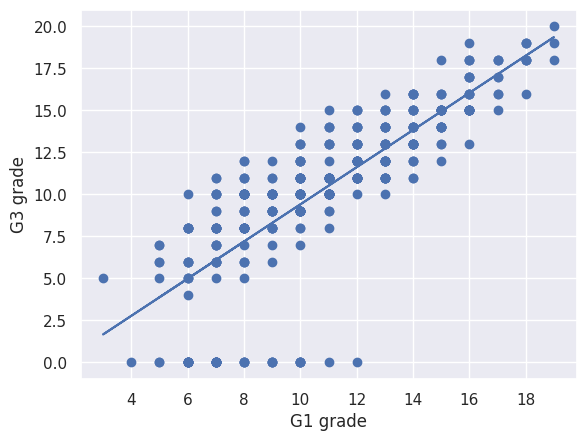

In [ ]:
# Same scatter plot as before
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# Draw a linear regression line on it
plt.plot(X, reg.predict(X))
plt.grid(True)

### 4-2.4.2 Coefficient of Determination

Looking at the above graph, it appears that the forecasting equation predicts the actual values well, but it is not possible to determine what this means objectively. Therefore, the **coefficient of determination** is used to quantify it. The coefficient of determination is also called the contribution ratio. The definition is as follows. The coefficient of determination is commonly denoted as $R^2$.

\begin{eqnarray}
R^2 = 1 - \frac{\sum_{i = 1}^n(y_i - f(x_i))^2}{\sum_{i = 1}^{n}(y_i - \bar{y})^2}
\end{eqnarray}

The $R^2$ takes a value of at most 1, and the closer to 1, the better the model. The $\bar{y}$ is the mean value of the target variable. If the squared error is equal to that obtained by always predicting with $\bar{y}$ (a constant) without an explanatory variable, then $R^2=0$. To find the coefficient of determination using Python, use `score` to do the following.

In [ ]:
# Coefficient of Determination, also called contribution ratio
print('Coefficient :', reg.score(X, Y))

Coefficient : 0.6423508460522701


In addition, there is the question of how high this coefficient of determination value should be. In textbook data and problems, it is often 0.9 or higher, but in practice, it is not always possible to get that high, and it is a case-by-case basis how to determine it. Incidentally, 0.64 above is not high, but it is also not unusable when viewed at the field level.

This concludes the explanation of single regression analysis and this chapter. The rest of the chapter will be questions and comprehensive exercises. Please take on the challenge.

#### <Practice Question 4-2-5>

Using the data from student-por.csv, the Portuguese grade data, perform a single regression analysis with `G3` as the target variable and `G1` as the explanatory variable and find the regression coefficient, intercept and coefficient of determination.

#### <Pratice Question 4-2-6>

Graph the actual scatterplot of the data from <Practice Question 4-2-5> together with the regression line.

#### <Pratice Question 4-2-7>

Using the data in student-por.csv, perform a single regression analysis with `G3` as the target variable and `absences` (number of absences) as the explanatory variable and find the regression coefficient, intercept and coefficient of determination. Also, graph the scatterplot and regression line and discuss these results.

***

## 4-2.5 Comprehensive Question

### Comprehensive Question 4-2-1 Statistical Basics and Visualization

Please read the data (wine quality) on the following website and answer the following questions

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

(1) Calculate the summary statistics (mean, maximum, minimum, standard deviation, etc.).

(2) Graph the distribution of each variable and the relationship between each variable (between two variables only). Are there any trends that you can identify?

### Comprehensive Question 4-2-2 Lorenz Curve and Gini Coefficient

Please answer the following questions using the sample data student_data_math data used in this chapter. The Lorenz curve and Gini coefficient, which are treated here, are used as indicators to look at disparities in wealth (by region, country, etc.) (Note that this question is a bit challenging and should be viewed only as a reference. (For more details, please refer to literature such as the Introduction to Statistics previously mentioned or search the Internet).

(1) For the mathematical data of the first term, sort the data by gender in ascending order. Then, take the cumulative ratio of the number of people on the horizontal axis and the cumulative ratio of the first term values on the vertical axis. This curve is called the Lorenz curve. Plot this Lorenz curve on a graph of first term math scores by gender.

(2) The numerical expression of the degree of inequality is called the Gini coefficient. This value is defined as twice the area of the area bounded by the Lorenz curve and the 45 degree line, and takes a value between 0 and 1. The larger the value, the greater the degree of inequality. The Gini coefficient can be defined as follows where $\overline{x}$ is the mean value.

\begin{eqnarray}
GI=\sum_{i}\sum_{j}\left| \frac{x_i-x_j}{2n^2 \overline{x}}\right|
\end{eqnarray}

Using this, find the Gini coefficient for each of the first term grades for men and women.

***

**Acknowledgements**: For use of the following two datasets
1. https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
2. http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**References**: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

- Note on citation of dataset in 1:   
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp.5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[http://www3.dsi.uminho.pt/pcortez/student.pdf](http://www3.dsi.uminho.pt/pcortez/student.pdf)  

- Note on citation of dataset in 2:   
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

- A-5:  
[Introduction to Statistics (Basic Statistics I)]Toukeigaku nyumon(Kiso Toukeigaku I)(in Japanese).(published by University of Tokyo Publishing, ISBN:978-4130420655)  

  [Statistics]Toukeigaku(in Japanese).(published by University of Tokyo Publishing, ISBN:978-4130629218)  

  [Statistics]Toukeigaku(in Japanese).(published by Yuhikaku)  


- A-9:  
[Fundamental Calculus for Engineers: Mastering the Mathematics Essential for Machine Learning
]Gijutusya no tameno kiso kaisekigaku: Kikai gakusyu ni hitsuyou na sugaku wo honkide manabu(in Japanese).(Shoeisha, ISBN:978-4798155357)  

  [Linear Algebra for Engineers: Mastering the Fundamentals of University-Level Mathematics]Gijutusya no tameno senkei daisugaku: Daigaku no kiso sugaku wo honkide manabu(in Japanese).(Shoeisha, ISBN:978-4798155364)  

  [Probability and Statistics for Engineers: Mastering the Fundamentals of University-Level Mathematics]Gijutusya no tameno kakuritsu tokei: Daigaku no kiso sugaku wo honkide manabu(in Japanese).(Shoeisha, ISBN:978-4798155364)  


- B-10:  
[Time for Statistics]Tokeigaku no jikan(in japanese)https://bellcurve.jp/statistics/course/#step1%22  